In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### brain_volume_ratio_to_baseline_____VS_____final diagnosischanges of each patient in each phase


#### sleep_brain_finaldxch.csv
#### 

In [36]:
com_col = ['Phase', 'RID', 'VISCODE','PTID','RID_Phase']
target = 'final_dxch'

In [37]:
sleep_brain_finaldxch = pd.read_csv('sleep_brain_finaldxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_finaldxch = sleep_brain_finaldxch[sleep_brain_finaldxch['final_dxch'].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_finaldxch

,RID,Phase,VISCODE,PTID,RID_Phase,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI2,v06,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI2,v21,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI2,v31,NaN,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI2,v41,011_S_0002,2_ADNI2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,ADNI2,v06,011_S_0008,8_ADNI2,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18438,6996,ADNI3,m12,003_S_6996,6996_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18439,6999,ADNI3,m12,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18440,6999,ADNI3,y1,035_S_6999,6999_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18441,7000,ADNI3,m12,035_S_7000,7000_ADNI3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
sleep_brain_finaldxch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18443 entries, 0 to 18442
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RID                             18443 non-null  int64  
 1   Phase                           18443 non-null  object 
 2   VISCODE                         17197 non-null  object 
 3   PTID                            17781 non-null  object 
 4   RID_Phase                       18443 non-null  object 
 5   NPIK1                           848 non-null    float64
 6   NPIK2                           847 non-null    float64
 7   NPIK3                           846 non-null    float64
 8   NPIK4                           846 non-null    float64
 9   NPIK5                           846 non-null    float64
 10  NPIK6                           847 non-null    float64
 11  NPIK7                           847 non-null    float64
 12  NPIK8                           

In [41]:
sleep_brain_finaldxch.columns

Index(['RID', 'Phase', 'VISCODE', 'PTID', 'RID_Phase', 'NPIK1', 'NPIK2',
       'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A',
       'NPIK9B', 'NPIK9C', 'NPIKTOT', 'insomnia', 'OSA', 'final_dxch',
       'DXCHANGE', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'Ventricles_reduction_per_year', 'Hippocampus_reduction_per_year',
       'wholebrain_reduction_per_year', 'Entorhinal_reduction_per_year',
       'Fusiform_reduction_per_year', 'ICV_reduction_per_year',
       'ABETA_reduction_per_year', 'TAU_reduction_per_year',
       'PTAU_reduction_per_year'],
      dtype='object')

### brain_biomarker______VS______final_dxch

In [64]:
col_lst = [ 'final_dxch','ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
bio_lst = [ 'final_dxch','ratio_ABETA_bl', 'ratio_TAU_bl','ratio_PTAU_bl']
brain_dxch = sleep_brain_finaldxch[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
#biomarkers to dxch
bio_dxch = sleep_brain_finaldxch[com_col + bio_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()
df = brain_dxch.copy()
df2 = brain_dxch.copy()

In [93]:
df2['final_dxch'] = df2['final_dxch'].replace({'CN-MCI':'CN-AD','MCI-MCI':'MCI-AD'})

In [43]:
np.sum(df.isna())   # check nan

Phase                             0
RID                               0
VISCODE                           0
PTID                              0
RID_Phase                         0
final_dxch                        0
ratio_Ventricles_bl               0
ratio_Hippocampus_bl              0
ratio_WholeBrain_bl               0
ratio_Entorhinal_bl               0
ratio_Fusiform_bl                 0
Ventricles_reduction_per_year     0
Hippocampus_reduction_per_year    0
wholebrain_reduction_per_year     0
Entorhinal_reduction_per_year     0
Fusiform_reduction_per_year       0
ICV_reduction_per_year            0
dtype: int64

In [94]:
df2.groupby(target).count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
final_dxch,,,,,,,,,,,,,,,,
AD-AD,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589
AD-MCI,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CN-AD,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252
CN-CN,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422
MCI-AD,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861
MCI-CN,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112


In [49]:
df.groupby(target).count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
final_dxch,,,,,,,,,,,,,,,,
AD-AD,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589,589
AD-MCI,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CN-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
CN-CN,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422
CN-MCI,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
MCI-AD,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
MCI-CN,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
MCI-MCI,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355,1355


- unselect the AD-MCI. Because TOO FEW data.
- the possible groups: ['AD-AD', 'CN-AD', 'CN-CN', 'CN-MCI', 'MCI-AD', 'MCI-CN','MCI-MCI']
- ['CN-AD', 'CN-CN', 'CN-MCI'] 
- ['MCI-AD', 'MCI-CN','MCI-MCI']

In [99]:
df2_2 = df2.loc[df2[target].isin(['CN-AD', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df2_2mci = df2.loc[df2[target].isin(['MCI-AD', 'MCI-CN'])].reset_index().drop(['index'],axis=1)
df2_2mci.shape

(1973, 17)

In [83]:
df_2cn = df.loc[df[target].isin(['CN-AD', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df_2cn.shape

(1502, 17)

In [50]:
df_3cn = df.loc[df[target].isin(['CN-AD', 'CN-CN', 'CN-MCI'])].reset_index().drop(['index'],axis=1)
df_3cn.shape     # works not that good

(1674, 17)

In [86]:
df_2mci = df.loc[df[target].isin(['MCI-AD', 'MCI-CN'])].reset_index().drop(['index'],axis=1)
df_2mci.shape

(618, 17)

In [51]:
df_3mci = df.loc[df[target].isin(['MCI-AD', 'MCI-CN','MCI-MCI'])].reset_index().drop(['index'],axis=1)
df_3mci.shape

(1973, 17)

### undersampling and modeling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [52]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID','RID_Phase',target]

k=10

## CN  to CN or (MCI + AD)
'CN-AD': 80, 'CN-CN': 80

In [79]:
df2_2.groupby('final_dxch').count()

,Phase,RID,VISCODE,PTID,RID_Phase,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
final_dxch,,,,,,,,,,,,,,,,
CN-AD,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80
CN-CN,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422,1422


In [82]:
models(df2_2,drop_lst,target)

After undersampling data size is 504 ; Resampled dataset shape Counter({'CN-AD': 252, 'CN-CN': 252})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.672, Test set f1-score: 0.644
          - saga_L1, Training set f1-score:0.661, Test set f1-score: 0.688
          - newton-cg_L2, Training set f1-score:0.672, Test set f1-score: 0.644
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.667, Test set f1-score: 0.643
          - saga_L1, Training set f1-score:0.672, Test set f1-score: 0.644
          - newton-cg_L2, Training set f1-score:0.667, Test set f1-score: 0.643
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.600, Test set f1-score: 0.671
          - saga_L1, Training set f1-score:0.661, Test set f1-score: 0.688
       

          - 10trees. f1-score on training data: 0.983 f1-score on test data: 0.629
          - 15trees. f1-score on training data: 0.985 f1-score on test data: 0.664
          - 20trees. f1-score on training data: 0.998 f1-score on test data: 0.651
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.703
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.667
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.695
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.647
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.674
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.675
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.674
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.675
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.685
    

In [ ]:
cv_models(df2_2,drop_lst,target,k)

# - 'CN-AD': 80, 'CN-CN': 80

-  'CN-AD': 80, 'CN-CN': 80
- unscaled data RandomForest 10trees. average weighted f1-score of 10-cross validation:0.721

In [84]:
models(df_2cn,drop_lst,target)

After undersampling data size is 160 ; Resampled dataset shape Counter({'CN-AD': 80, 'CN-CN': 80})

4 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.701, Test set f1-score: 0.512
          - saga_L1, Training set f1-score:0.701, Test set f1-score: 0.512
          - newton-cg_L2, Training set f1-score:0.701, Test set f1-score: 0.512
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.699, Test set f1-score: 0.512
          - saga_L1, Training set f1-score:0.701, Test set f1-score: 0.512
          - newton-cg_L2, Training set f1-score:0.699, Test set f1-score: 0.512
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.699, Test set f1-score: 0.512
          - saga_L1, Training set f1-score:0.701, Test set f1-score: 0.512
         

          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.683
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.744
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.744
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.744
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 75trees. f1-score on training data: 1.000 f1-score on test data: 0.713
          - 80trees. f1-score on training data: 1.000 f1-score on test data: 0.713
    

In [85]:
cv_models(df_2cn,drop_lst,target,k)

After undersampling data size is 160 ; Resampled dataset shape Counter({'CN-AD': 80, 'CN-CN': 80})

4 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.603
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.593
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.606
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.606
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.609
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.609
       - C = 1
          - lbf

          - 25trees. average weighted f1-score of 10-cross validation:0.688
          - 30trees. average weighted f1-score of 10-cross validation:0.699
          - 35trees. average weighted f1-score of 10-cross validation:0.669
          - 40trees. average weighted f1-score of 10-cross validation:0.652
          - 45trees. average weighted f1-score of 10-cross validation:0.644
          - 50trees. average weighted f1-score of 10-cross validation:0.661
          - 55trees. average weighted f1-score of 10-cross validation:0.641
          - 60trees. average weighted f1-score of 10-cross validation:0.660
          - 65trees. average weighted f1-score of 10-cross validation:0.641
          - 70trees. average weighted f1-score of 10-cross validation:0.644
          - 75trees. average weighted f1-score of 10-cross validation:0.646
          - 80trees. average weighted f1-score of 10-cross validation:0.654
          - 85trees. average weighted f1-score of 10-cross validation:0.648
          - 

After undersampling data size is 160 ; Resampled dataset shape Counter({'CN-AD': 80, 'CN-CN': 80})

4 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
ratio_Fusiform_bl,0.128088,0.110075,0.143304,0.120337,0.138659,0.162443,0.133484,0.112734,0.125154,0.095944,0.138747
Ventricles_reduction_per_year,0.121664,0.119993,0.123673,0.123027,0.097004,0.132817,0.134798,0.099047,0.125551,0.126208,0.134524
ratio_WholeBrain_bl,0.113385,0.128688,0.089762,0.134793,0.140439,0.111683,0.133535,0.140199,0.079746,0.119205,0.055799
ratio_Entorhinal_bl,0.102654,0.096434,0.096292,0.081435,0.119998,0.093434,0.082549,0.136252,0.118938,0.097268,0.103939
wholebrain_reduction_per_year,0.099226,0.091270,0.107336,0.127241,0.085189,0.076640,0.082398,0.086563,0.072302,0.133552,0.129773
Hippocampus_reduction_per_year,0.093582,0.052868,0.100059,0.093179,0.099541,0.113810,0.086822,0.117476,0.082126,0.105169,0.084771
Fusiform_reduction_per_year,0.081614,0.092502,0.087852,0.052421,0.083556,0.106870,0.084536,0.096098,0.063846,0.047930,0.100528
ratio_Hippocampus_bl,0.073347,0.076503,0.064770,0.098761,0.105106,0.049253,0.059711,0.036804,0.078059,0.081709,0.082791
Entorhinal_reduction_per_year,0.068579,0.090824,0.065252,0.063163,0.055206,0.068877,0.053319,0.059663,0.099165,0.084124,0.046193
ratio_Ventricles_bl,0.067144,0.071883,0.078398,0.058357,0.031563,0.044155,0.096902,0.071072,0.084981,0.068858,0.065270


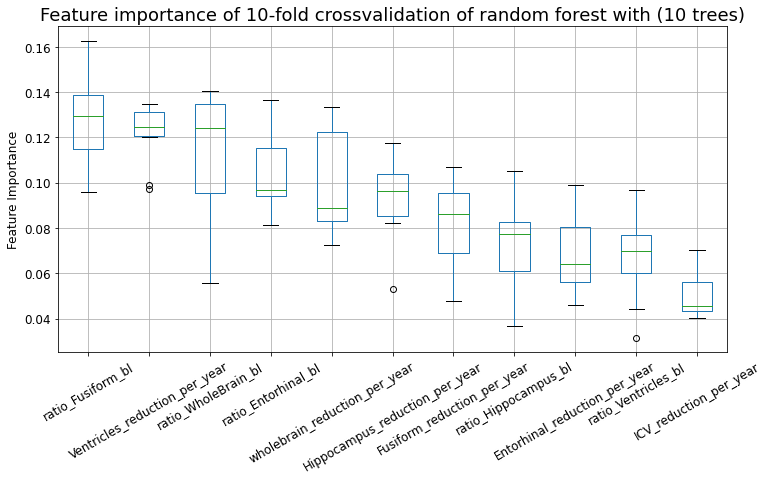

In [92]:
res = usampling_scale_data(df_2cn,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators =10, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (10 trees)'
feature_importance(X,y,clf,10,title_label)

### - 'MCI-AD': 112, 'MCI-CN': 112, where (MCI-MCI are renamed to MCI-AD)
- original data, random forest 30trees. average weighted f1-score of 10-cross validation:0.715

--- not that good as directly use MCI-AD and MCI-CN

In [101]:
cv_models(df2_2mci,drop_lst,target,k)

After undersampling data size is 224 ; Resampled dataset shape Counter({'MCI-AD': 112, 'MCI-CN': 112})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.394
          - saga_L1, average weighted f1-score of 10-cross validation:0.343
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.394
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.407
          - saga_L1, average weighted f1-score of 10-cross validation:0.338
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.407
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.527
          - saga_L1, average weighted f1-score of 10-cross validation:0.329
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.527
       - C = 1
          -

          - 25trees. average weighted f1-score of 10-cross validation:0.545
          - 30trees. average weighted f1-score of 10-cross validation:0.537
          - 35trees. average weighted f1-score of 10-cross validation:0.554
          - 40trees. average weighted f1-score of 10-cross validation:0.562
          - 45trees. average weighted f1-score of 10-cross validation:0.553
          - 50trees. average weighted f1-score of 10-cross validation:0.580
          - 55trees. average weighted f1-score of 10-cross validation:0.583
          - 60trees. average weighted f1-score of 10-cross validation:0.599
          - 65trees. average weighted f1-score of 10-cross validation:0.595
          - 70trees. average weighted f1-score of 10-cross validation:0.582
          - 75trees. average weighted f1-score of 10-cross validation:0.586
          - 80trees. average weighted f1-score of 10-cross validation:0.595
          - 85trees. average weighted f1-score of 10-cross validation:0.572
          - 

### - 'MCI-AD': 112, 'MCI-CN': 112
- 30trees. average weighted f1-score of 10-cross validation:0.715

In [88]:
cv_models(df_2mci,drop_lst,target,k)

After undersampling data size is 224 ; Resampled dataset shape Counter({'MCI-AD': 112, 'MCI-CN': 112})

7 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.503
          - saga_L1, average weighted f1-score of 10-cross validation:0.329
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.503
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.590
          - saga_L1, average weighted f1-score of 10-cross validation:0.329
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.590
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.629
          - saga_L1, average weighted f1-score of 10-cross validation:0.329
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.629
       - C = 1
          -

          - 25trees. average weighted f1-score of 10-cross validation:0.705
          - 30trees. average weighted f1-score of 10-cross validation:0.715
          - 35trees. average weighted f1-score of 10-cross validation:0.701
          - 40trees. average weighted f1-score of 10-cross validation:0.697
          - 45trees. average weighted f1-score of 10-cross validation:0.697
          - 50trees. average weighted f1-score of 10-cross validation:0.701
          - 55trees. average weighted f1-score of 10-cross validation:0.701
          - 60trees. average weighted f1-score of 10-cross validation:0.715
          - 65trees. average weighted f1-score of 10-cross validation:0.715
          - 70trees. average weighted f1-score of 10-cross validation:0.706
          - 75trees. average weighted f1-score of 10-cross validation:0.698
          - 80trees. average weighted f1-score of 10-cross validation:0.702
          - 85trees. average weighted f1-score of 10-cross validation:0.707
          - 

After undersampling data size is 224 ; Resampled dataset shape Counter({'MCI-AD': 112, 'MCI-CN': 112})

7 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
ratio_Hippocampus_bl,0.127009,0.090769,0.118476,0.131292,0.128134,0.133840,0.148955,0.135675,0.141577,0.103637,0.137737
ratio_Entorhinal_bl,0.118094,0.120046,0.124082,0.108989,0.105968,0.107434,0.124764,0.108518,0.131467,0.116192,0.133483
Hippocampus_reduction_per_year,0.118054,0.128368,0.122896,0.119948,0.099914,0.143711,0.094513,0.111464,0.126052,0.123141,0.110534
Entorhinal_reduction_per_year,0.097740,0.099529,0.094351,0.098514,0.092413,0.067944,0.115509,0.106613,0.096074,0.109073,0.097378
ratio_Fusiform_bl,0.094537,0.075940,0.063731,0.084784,0.102060,0.090211,0.109180,0.116035,0.098355,0.110612,0.094458
wholebrain_reduction_per_year,0.093795,0.110875,0.087063,0.094659,0.085167,0.087346,0.075900,0.112222,0.089061,0.088268,0.107387
Ventricles_reduction_per_year,0.093304,0.083403,0.114420,0.090457,0.097334,0.106569,0.089300,0.087585,0.088582,0.101275,0.074115
ICV_reduction_per_year,0.073912,0.075702,0.066236,0.078145,0.071834,0.083951,0.074570,0.060558,0.070176,0.083198,0.074752
ratio_Ventricles_bl,0.068149,0.077135,0.081905,0.064447,0.096343,0.065059,0.073721,0.059884,0.052536,0.051678,0.058787
Fusiform_reduction_per_year,0.063264,0.068736,0.064366,0.076460,0.069566,0.065625,0.047972,0.059887,0.049502,0.058374,0.072148


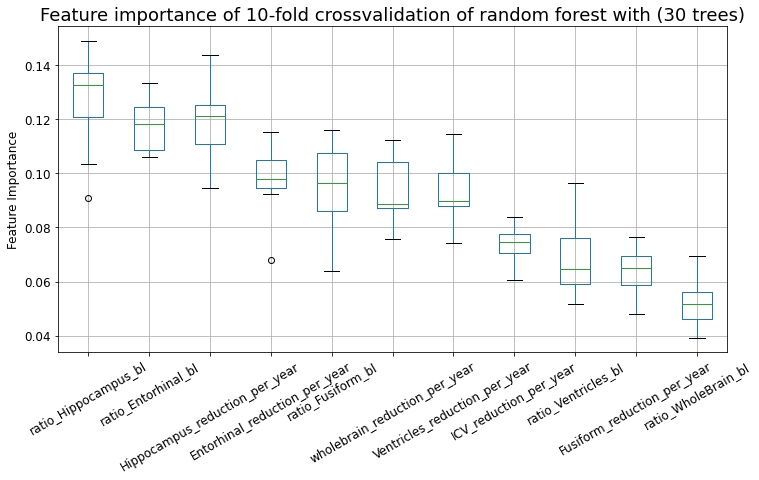

In [91]:
res = usampling_scale_data(df_2mci,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators = 30, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (30 trees)'
feature_importance(X,y,clf,k,title_label)

## - 'MCI-AD': 112, 'MCI-CN': 112, 'MCI-MCI': 112

NOT GOOD

In [89]:
models(df_3mci,drop_lst,target)

After undersampling data size is 336 ; Resampled dataset shape Counter({'MCI-AD': 112, 'MCI-CN': 112, 'MCI-MCI': 112})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.492, Test set f1-score: 0.427
          - saga_L1, Training set f1-score:0.511, Test set f1-score: 0.455
          - newton-cg_L2, Training set f1-score:0.492, Test set f1-score: 0.427
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.457, Test set f1-score: 0.445
          - saga_L1, Training set f1-score:0.507, Test set f1-score: 0.472
          - newton-cg_L2, Training set f1-score:0.457, Test set f1-score: 0.445
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.520, Test set f1-score: 0.322
          - saga_L1, Training set f1-score:0.504, Test set f1-sc

          - 20trees. f1-score on training data: 0.996 f1-score on test data: 0.371
          - 25trees. f1-score on training data: 1.000 f1-score on test data: 0.391
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.368
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.397
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.402
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.416
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.383
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.383
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.369
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.366
          - 70trees. f1-score on training data: 1.000 f1-score on test data: 0.398
          - 75trees. f1-score on training data: 1.000 f1-score on test data: 0.386
    

In [90]:
cv_models(df_3mci,drop_lst,target,k)

After undersampling data size is 336 ; Resampled dataset shape Counter({'MCI-AD': 112, 'MCI-CN': 112, 'MCI-MCI': 112})

7 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.322
          - saga_L1, average weighted f1-score of 10-cross validation:0.164
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.322
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.380
          - saga_L1, average weighted f1-score of 10-cross validation:0.167
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.380
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.394
          - saga_L1, average weighted f1-score of 10-cross validation:0.210
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.394
       - C

          - 25trees. average weighted f1-score of 10-cross validation:0.469
          - 30trees. average weighted f1-score of 10-cross validation:0.448
          - 35trees. average weighted f1-score of 10-cross validation:0.476
          - 40trees. average weighted f1-score of 10-cross validation:0.464
          - 45trees. average weighted f1-score of 10-cross validation:0.467
          - 50trees. average weighted f1-score of 10-cross validation:0.460
          - 55trees. average weighted f1-score of 10-cross validation:0.463
          - 60trees. average weighted f1-score of 10-cross validation:0.481
          - 65trees. average weighted f1-score of 10-cross validation:0.484
          - 70trees. average weighted f1-score of 10-cross validation:0.478
          - 75trees. average weighted f1-score of 10-cross validation:0.488
          - 80trees. average weighted f1-score of 10-cross validation:0.496
          - 85trees. average weighted f1-score of 10-cross validation:0.486
          - 